<a href="https://colab.research.google.com/github/israelguadarrama44/analisis_inpc_colab/blob/main/analisis_egresos_mexico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
from google.colab import drive

# Monta tu Google Drive
drive.mount('/content/drive')

# Define la ruta correcta con la 'D' mayúscula
file_path = '/content/drive/MyDrive/Datasets/efipem_estatal_anual_tr_cifra_2023.csv'

try:
    # Carga el archivo CSV en un DataFrame de pandas
    df = pd.read_csv(file_path)

    print("¡Archivo cargado exitosamente!")
    # Muestra las primeras filas del DataFrame para verificar
    print(df.head())

    print("\nInformación del DataFrame:")
    print(df.info())

except FileNotFoundError:
    print(f"Error: El archivo no se encontró en la ruta '{file_path}'.")
    print("Asegúrate de que el nombre del archivo sea exactamente 'efipem_estatal_anual_tr_cifra_2023.csv' y que la carpeta 'Datasets' esté directamente en 'Mi unidad'.")
except Exception as e:
    print(f"Ocurrió un error al cargar el archivo: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
¡Archivo cargado exitosamente!
                                            PROD_EST COBERTURA  ANIO  \
0  Estadística de Finanzas Públicas Estatales y M...   Estatal  2023   
1  Estadística de Finanzas Públicas Estatales y M...   Estatal  2023   
2  Estadística de Finanzas Públicas Estatales y M...   Estatal  2023   
3  Estadística de Finanzas Públicas Estatales y M...   Estatal  2023   
4  Estadística de Finanzas Públicas Estatales y M...   Estatal  2023   

   ID_ENTIDAD     TEMA         CATEGORIA           DESCRIPCION_CATEGORIA  \
0           1  Egresos              Tema                Total de egresos   
1           1  Egresos          Capítulo            Servicios personales   
2           1  Egresos          Concepto      Remuneraciones al personal   
3           1  Egresos  Partida Genérica  Despacho del ejecutivo estatal   
4           1  Egresos  Par

--- 1. CONFIGURACIÓN INICIAL Y CARGA DE DATOS ---
Montando Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google Drive montado.

¡Archivo 'efipem_estatal_anual_tr_cifra_2023.csv' cargado exitosamente!
Dimensiones del DataFrame: 10579 filas, 9 columnas.

Primeras 5 filas del DataFrame:
                                            PROD_EST COBERTURA  ANIO  \
0  Estadística de Finanzas Públicas Estatales y M...   Estatal  2023   
1  Estadística de Finanzas Públicas Estatales y M...   Estatal  2023   
2  Estadística de Finanzas Públicas Estatales y M...   Estatal  2023   
3  Estadística de Finanzas Públicas Estatales y M...   Estatal  2023   
4  Estadística de Finanzas Públicas Estatales y M...   Estatal  2023   

   ID_ENTIDAD     TEMA         CATEGORIA           DESCRIPCION_CATEGORIA  \
0           1  Egresos              Tema                Total de egresos   
1           1  Egresos         

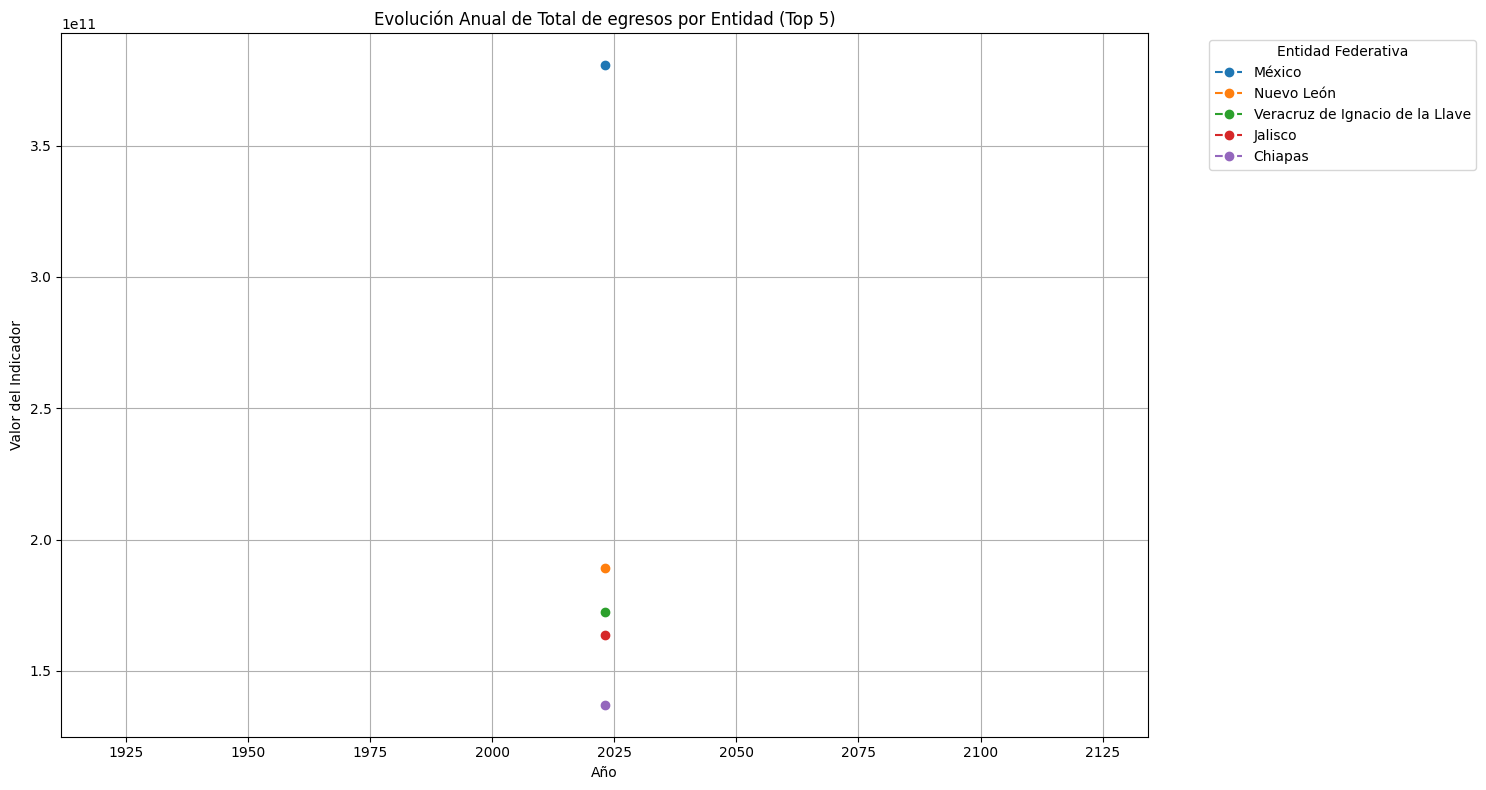

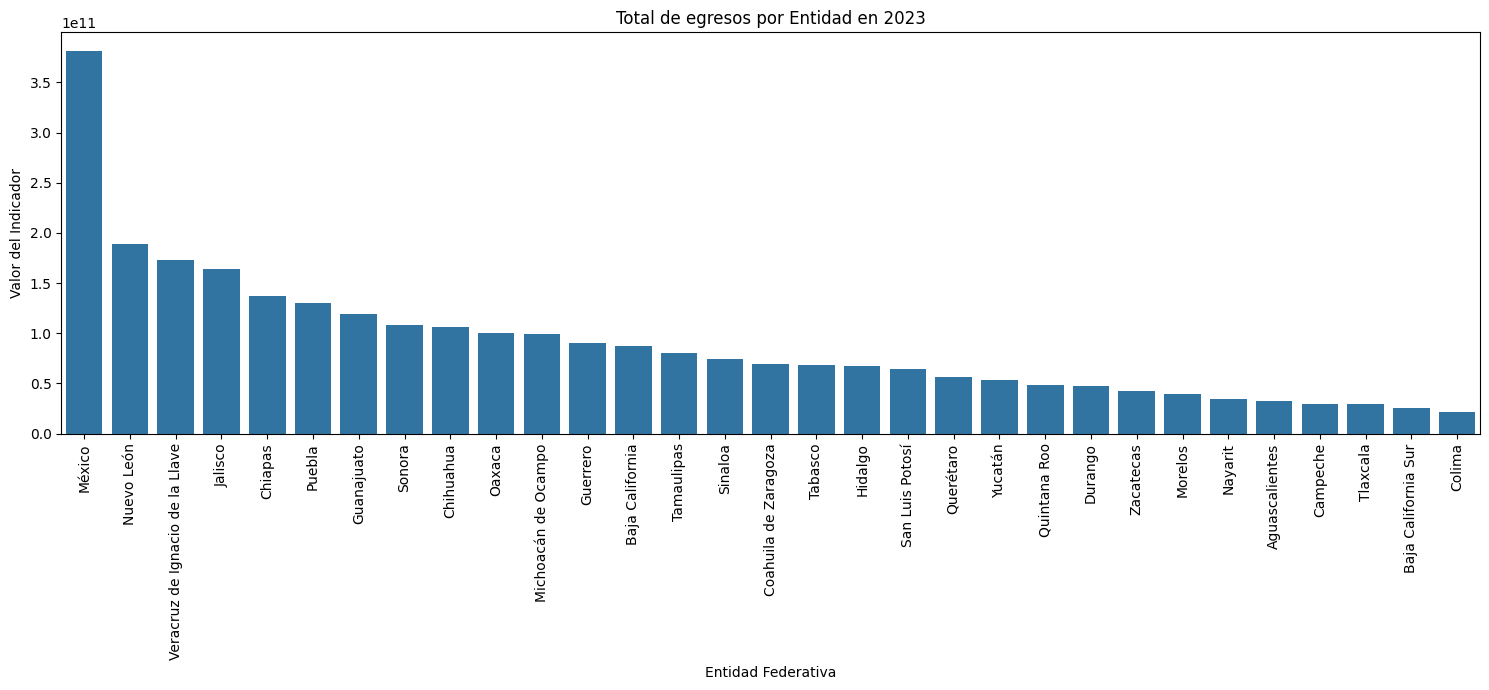


--- 4. INTERPRETACIÓN Y POSIBLES CONCLUSIONES ---

Análisis del indicador 'Total de egresos' para el tema 'Egresos':
- La evolución temporal de los egresos muestra (observar el gráfico de líneas):
  - El valor máximo histórico observado fue de 380780452400.00 en el año 2023 por México.
  - El valor mínimo histórico observado fue de 21673383120.00 en el año 2023 por Colima.
- La distribución de egresos por entidad en el último año revela (observar el gráfico de barras):
  - La entidad con los mayores 'Total de egresos' en el último año (2023) fue México con un valor de 380780452400.00.


In [9]:
# --- 1. CONFIGURACIÓN INICIAL Y CARGA DE DATOS ---
print("--- 1. CONFIGURACIÓN INICIAL Y CARGA DE DATOS ---")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Montar Google Drive
print("Montando Google Drive...")
drive.mount('/content/drive')
print("Google Drive montado.")

# Ruta al archivo CSV (asegúrate de que sea correcta)
file_path = '/content/drive/MyDrive/Datasets/efipem_estatal_anual_tr_cifra_2023.csv'

# Cargar los datos
try:
    df = pd.read_csv(file_path)
    print("\n¡Archivo 'efipem_estatal_anual_tr_cifra_2023.csv' cargado exitosamente!")
    print(f"Dimensiones del DataFrame: {df.shape[0]} filas, {df.shape[1]} columnas.")
    print("\nPrimeras 5 filas del DataFrame:")
    print(df.head())
    print("\nInformación general del DataFrame:")
    df.info()
except FileNotFoundError:
    print(f"ERROR: El archivo no se encontró en la ruta '{file_path}'.")
    print("Por favor, verifica el nombre de la carpeta 'Datasets' (mayúsculas/minúsculas) y el nombre del archivo.")
    exit() # Salir si el archivo no se encuentra

# --- 2. PREPARACIÓN DE DATOS ---
print("\n--- 2. PREPARACIÓN DE DATOS ---")

# Mapeo de ID_ENTIDAD a nombres de estados (esto es crucial para la legibilidad)
estados_mexico = {
    1: 'Aguascalientes', 2: 'Baja California', 3: 'Baja California Sur', 4: 'Campeche',
    5: 'Coahuila de Zaragoza', 6: 'Colima', 7: 'Chiapas', 8: 'Chihuahua',
    9: 'Ciudad de México', 10: 'Durango', 11: 'Guanajuato', 12: 'Guerrero',
    13: 'Hidalgo', 14: 'Jalisco', 15: 'México', 16: 'Michoacán de Ocampo',
    17: 'Morelos', 18: 'Nayarit', 19: 'Nuevo León', 20: 'Oaxaca',
    21: 'Puebla', 22: 'Querétaro', 23: 'Quintana Roo', 24: 'San Luis Potosí',
    25: 'Sinaloa', 26: 'Sonora', 27: 'Tabasco', 28: 'Tamaulipas',
    29: 'Tlaxcala', 30: 'Veracruz de Ignacio de la Llave', 31: 'Yucatán', 32: 'Zacatecas'
}
df['NOMBRE_ENTIDAD'] = df['ID_ENTIDAD'].map(estados_mexico)

# Filtra por 'COBERTURA' si existe un valor 'Nacional' o 'Estatal'
if 'Nacional' in df['COBERTURA'].unique():
    df_estatal = df[df['COBERTURA'] == 'Estatal'].copy()
    print("Filtrado por cobertura 'Estatal'.")
else:
    df_estatal = df.copy() # Si solo hay un tipo de cobertura, usa todo el df
    print("No se encontró cobertura 'Nacional', usando todos los datos disponibles.")

# Verificación de valores únicos de las columnas categóricas relevantes
print("\nValores únicos de 'TEMA':", df_estatal['TEMA'].unique())
print("Valores únicos de 'CATEGORIA':", df_estatal['CATEGORIA'].unique()[:5], "...")
print("Valores únicos de 'DESCRIPCION_CATEGORIA':", df_estatal['DESCRIPCION_CATEGORIA'].unique()[:5], "...")
print("Valores únicos de 'PROD_EST':", df_estatal['PROD_EST'].unique()[:5], "...")


# --- 3. ANÁLISIS EXPLORATORIO DE DATOS Y VISUALIZACIÓN ---
print("\n--- 3. ANÁLISIS EXPLORATORIO DE DATOS Y VISUALIZACIÓN ---")

# --- AJUSTE CLAVE AQUÍ ---
# Basado en tus datos, vamos a analizar 'Egresos' y la descripción 'Total de egresos'
tema_interes = 'Egresos'
categoria_interes = 'Total de egresos' # Esta debería ser una DESCRIPCION_CATEGORIA

print(f"\nAnalizando el indicador: TEMA='{tema_interes}' - DESCRIPCION_CATEGORIA='{categoria_interes}'")

# Filtrar el DataFrame para el indicador específico
df_filtrado_indicador = df_estatal[
    (df_estatal['TEMA'] == tema_interes) &
    (df_estatal['DESCRIPCION_CATEGORIA'] == categoria_interes)
].copy()

if df_filtrado_indicador.empty:
    print(f"ADVERTENCIA: No se encontraron datos para el TEMA '{tema_interes}' y DESCRIPCION_CATEGORIA '{categoria_interes}'.")
    print("Por favor, revisa los valores únicos de 'TEMA' y 'DESCRIPCION_CATEGORIA' en tu dataset y ajusta las variables 'tema_interes' y 'categoria_interes'.")
else:
    # Agregación por año y estado para el indicador seleccionado
    df_agg_anual_estatal = df_filtrado_indicador.pivot_table(
        index='ANIO',
        columns='NOMBRE_ENTIDAD',
        values='VALOR',
        aggfunc='sum' # Sumamos los valores si hay múltiples entradas por año/estado para el mismo indicador
    )

    print("\nValores del indicador por año y entidad (primeras filas):")
    print(df_agg_anual_estatal.head())

    # Visualización: Evolución del indicador en las 5 entidades con mayor valor promedio
    plt.figure(figsize=(15, 8))
    top_5_entidades = df_agg_anual_estatal.mean().nlargest(5).index
    df_agg_anual_estatal[top_5_entidades].plot(ax=plt.gca(), marker='o', linestyle='--')
    plt.title(f'Evolución Anual de {categoria_interes} por Entidad (Top 5)')
    plt.xlabel('Año')
    plt.ylabel('Valor del Indicador')
    plt.grid(True)
    plt.legend(title='Entidad Federativa', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # Visualización: Distribución del indicador por entidad en el último año disponible
    plt.figure(figsize=(15, 7))
    latest_year_data = df_filtrado_indicador[df_filtrado_indicador['ANIO'] == df_filtrado_indicador['ANIO'].max()]
    sns.barplot(
        x='NOMBRE_ENTIDAD',
        y='VALOR',
        data=latest_year_data.groupby('NOMBRE_ENTIDAD')['VALOR'].sum().reset_index().sort_values(by='VALOR', ascending=False)
    )
    plt.title(f'{categoria_interes} por Entidad en {df_filtrado_indicador["ANIO"].max()}')
    plt.xlabel('Entidad Federativa')
    plt.ylabel('Valor del Indicador')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# --- 4. INTERPRETACIÓN Y POSIBLES CONCLUSIONES ---
print("\n--- 4. INTERPRETACIÓN Y POSIBLES CONCLUSIONES ---")
if 'df_filtrado_indicador' in locals() and not df_filtrado_indicador.empty:
    print(f"\nAnálisis del indicador '{categoria_interes}' para el tema '{tema_interes}':")
    print("- La evolución temporal de los egresos muestra (observar el gráfico de líneas):")
    if 'df_agg_anual_estatal' in locals() and df_agg_anual_estatal is not None:
        print(f"  - El valor máximo histórico observado fue de {df_agg_anual_estatal.max().max():.2f} en el año {df_agg_anual_estatal.stack().idxmax()[0]} por {df_agg_anual_estatal.stack().idxmax()[1]}.")
        print(f"  - El valor mínimo histórico observado fue de {df_agg_anual_estatal.min().min():.2f} en el año {df_agg_anual_estatal.stack().idxmin()[0]} por {df_agg_anual_estatal.stack().idxmin()[1]}.")
    print("- La distribución de egresos por entidad en el último año revela (observar el gráfico de barras):")
    if 'latest_year_data' in locals() and latest_year_data is not None and not latest_year_data.empty:
        top_entidad_ultimo_año = latest_year_data.groupby('NOMBRE_ENTIDAD')['VALOR'].sum().idxmax()
        valor_top_ultimo_año = latest_year_data.groupby('NOMBRE_ENTIDAD')['VALOR'].sum().max()
        print(f"  - La entidad con los mayores '{categoria_interes}' en el último año ({df_filtrado_indicador['ANIO'].max()}) fue {top_entidad_ultimo_año} con un valor de {valor_top_ultimo_año:.2f}.")

